In [78]:
%reset #clear namespace in dictionary

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Don't know how to reset  #clear, please run `%reset?` for details
Don't know how to reset  namespace, please run `%reset?` for details
Flushing input history
Don't know how to reset  dictionary, please run `%reset?` for details


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot = True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [3]:
%time 3**3**3 #use to time command execution

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 6.91 µs


7625597484987

In [4]:
#optimiazation algorithms
X=tf.Variable([1.0,2.0,-1.0,2.5])
Y=X**tf.constant(2.0)
Z=((X-1)*(X+1))**2 #(x-1)^2*(x+1)^2
lr=1.0
train_stepy= tf.train.GradientDescentOptimizer(lr).minimize(Y)
train_stepz= tf.train.GradientDescentOptimizer(lr).minimize(Z)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    x,y,z=sess.run([X,Y,Z])
    print(x)
    print(y)
    print(z)
    sess.run(train_stepy)
    print(sess.run([X,Y,Z])) #from this result it seems that the optimizer only takes a single step
    
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    x,y,z=sess.run([X,Y,Z])
    print(x)
    print(y)
    print(z)
    sess.run(train_stepz)
    print(sess.run([X,Y,Z]))

[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[ 0.  0.  0.  0.]
[array([ 0.,  0.,  0.,  0.], dtype=float32), array([ 0.,  0.,  0.,  0.], dtype=float32), array([ 0.,  0.,  0.,  0.], dtype=float32)]
[ 0.  0.  0.  0.]
[ 2.  0.  0.  0.]
[ 0.  0.  0.  0.]
[array([ 0.,  0.,  0.,  0.], dtype=float32), array([ 0.,  0.,  0.,  0.], dtype=float32), array([ 0.,  0.,  0.,  0.], dtype=float32)]


In [ ]:
#softmax cross entropy
data=tf.constant(np.append(np.zeros(9999),np.array(1.0)),tf.float64)
mod=tf.random_normal([10000],dtype=tf.float64)
#mod=tf.ones([10000],tf.float64)

ce=tf.nn.softmax_cross_entropy_with_logits(logits=mod, labels=data)
ce2= tf.reduce_mean(-tf.reduce_sum(data * tf.log(tf.nn.softmax(mod)), reduction_indices=[-1])) 

with tf.Session() as sess:
    ent,ent2=sess.run([ce,ce2])
    print(abs(ent-ent2))
#similar argumets but both methods can differ slightly typically e⁻12 or less

In [6]:
X = tf.placeholder(tf.float32, [None, 784]) #example vectors are horizontal here so we'll transpose it on multiplication
W = tf.Variable(tf.ones([10,784]))
b = tf.Variable(tf.ones([10]))
prod=tf.matmul(W,X,transpose_b=True)
sumation=tf.transpose(tf.transpose(prod) + b) #add b vertically (column by column) to the matrix
Ymod = tf.nn.softmax(tf.transpose(sumation)) #example label vectors are horizontal now,softmax normalization is applied this way
Ydata = tf.placeholder(tf.float32, [None, 10]) #validation label vectors are also horizontal 
cross_entropy = tf.reduce_mean(-tf.reduce_sum(Ydata * tf.log(Ymod), reduction_indices=[1])) 
# corss_entropy returns a single vector of the same size as the sample batch
# each entry is the cross entropy calculated for a particular example
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(Ymod,1), tf.argmax(Ydata,1)) #compares horizontally,i.e. component of each vector
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) #percentage of correct predictions

batch_size=100
no_of_epochs=50
sum_data=np.array([0,0,0,0,0])

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    
    #initial calculation of accuracy, loss,etc.
    loss=sess.run(cross_entropy,feed_dict={X: mnist.train.images,Ydata: mnist.train.labels})
    #print("Epoch:=",0,"; \t Epoch Loss:=",loss)
    t_acc=sess.run(accuracy, feed_dict={X: mnist.train.images, Ydata: mnist.train.labels})#calculates accuracy across all data
    #print("Training Accuracy is", t_acc*100,"%")
    v_acc=sess.run(accuracy, feed_dict={X: mnist.validation.images,Ydata:mnist.validation.labels})
    #print("Validation Accuracy is", v_acc*100,"%")
    f_acc=sess.run(accuracy, feed_dict={X: mnist.test.images,Ydata:mnist.test.labels})
    #print("Test Accuracy is", f_acc*100,"%")
    sum_data=np.array([0,loss,t_acc,v_acc,f_acc])
    
    for epoch in range(no_of_epochs):
        epoch_loss=0
        for i in range(int(mnist.train.num_examples/batch_size)): 
            batch_xs, batch_ys = mnist.train.next_batch(batch_size) #selects a random batch from the dataset for given size
            train,loss=sess.run([train_step,cross_entropy], feed_dict={X: batch_xs, Ydata: batch_ys})
            #this calculates gradient on the batch and performs one step with in the direction (all variables are used)
            epoch_loss+=loss #calculates loss for each batch and adds it up to calculate entire training data loss
        #print("Epoch:=",epoch+1,"; \t Epoch Loss:=",epoch_loss)
        t_acc=sess.run(accuracy, feed_dict={X: mnist.train.images, Ydata: mnist.train.labels})#calculates accuracy across all data
        #print("Training Accuracy is", t_acc*100,"%")
        v_acc=sess.run(accuracy, feed_dict={X: mnist.validation.images,Ydata:mnist.validation.labels})
        #print("Validation Accuracy is", v_acc*100,"%")
        f_acc=sess.run(accuracy, feed_dict={X: mnist.test.images,Ydata:mnist.test.labels})
        #print("Test Accuracy is", f_acc*100,"%")
        print("Finished Epoch",epoch+1)
        sum_data=np.vstack((sum_data,np.array([epoch+1,epoch_loss,t_acc,v_acc,f_acc])))

Finished Epoch 1
Finished Epoch 2
Finished Epoch 3
Finished Epoch 4
Finished Epoch 5
Finished Epoch 6
Finished Epoch 7
Finished Epoch 8
Finished Epoch 9
Finished Epoch 10
Finished Epoch 11
Finished Epoch 12
Finished Epoch 13
Finished Epoch 14
Finished Epoch 15
Finished Epoch 16
Finished Epoch 17
Finished Epoch 18
Finished Epoch 19
Finished Epoch 20
Finished Epoch 21
Finished Epoch 22
Finished Epoch 23
Finished Epoch 24
Finished Epoch 25
Finished Epoch 26
Finished Epoch 27
Finished Epoch 28
Finished Epoch 29
Finished Epoch 30
Finished Epoch 31
Finished Epoch 32
Finished Epoch 33
Finished Epoch 34
Finished Epoch 35
Finished Epoch 36
Finished Epoch 37
Finished Epoch 38
Finished Epoch 39
Finished Epoch 40
Finished Epoch 41
Finished Epoch 42
Finished Epoch 43
Finished Epoch 44
Finished Epoch 45
Finished Epoch 46
Finished Epoch 47
Finished Epoch 48
Finished Epoch 49
Finished Epoch 50


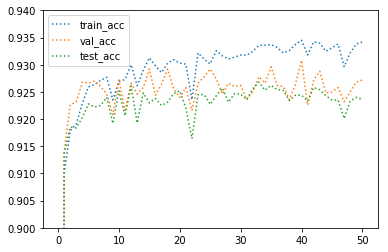

In [7]:
#plt.plot(sum_data[:,0],sum_data[:,1],label="epoch_loss")
plt.ylim(0.9,0.94)
plt.plot(sum_data[:,0],sum_data[:,2],label="train_acc",ls=':')
plt.plot(sum_data[:,0],sum_data[:,3],label="val_acc",ls=':')
plt.plot(sum_data[:,0],sum_data[:,4],label="test_acc",ls=':')
plt.legend()
plt.show()
#test and validationa accuracy get stuck over time(overfitting) 
#the optimal no of epoch seems to be around 10-15 epochs

In [8]:
n_nodes_hl1 = 500
n_nodes_hl2 = 500
n_nodes_hl3 = 500
n_classes = 10
batch_size = 100

X = tf.placeholder('float', [None, 784])
Ydata = tf.placeholder(tf.float32, [None, 10])

def neural_network_model(X):
    hidden_1_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl1,784])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl1]))}
    hidden_2_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl2,n_nodes_hl1])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl2]))}
    hidden_3_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl3, n_nodes_hl2])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl3]))}
    output_layer = {'weights':tf.Variable(tf.random_normal([n_classes,n_nodes_hl3])),
                    'biases':tf.Variable(tf.random_normal([n_classes])),}
    #if the weights & biases are initialized to ones or zeros performance drops drastically
    l1 = tf.add(tf.transpose(tf.matmul(hidden_1_layer['weights'],X,transpose_b=True)), hidden_1_layer['biases'])
    l1 = tf.nn.relu(l1)

    l2 = tf.add(tf.transpose(tf.matmul(hidden_2_layer['weights'],l1,transpose_b=True)), hidden_2_layer['biases'])
    l2 = tf.nn.relu(l2)

    l3 = tf.add(tf.transpose(tf.matmul(hidden_3_layer['weights'],l2,transpose_b=True)), hidden_3_layer['biases'])
    l3 = tf.nn.relu(l3)

    Ymod = tf.transpose(tf.matmul(output_layer['weights'],l3,transpose_b=True)) + output_layer['biases']
    #Ymod = tf.nn.softmax(Ymod) #example label vectors are horizontal now
    return Ymod 
    #note that output vector is not normalized, but converges to a normalized distribution through training(Ydata)


def train_neural_network(X):
    Ymod = neural_network_model(X)
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=Ymod, labels=Ydata))
    optimizer = tf.train.AdamOptimizer().minimize(cross_entropy)
    
    n_of_epochs = 20
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())

        for epoch in range(n_of_epochs):
            epoch_loss = 0
            for i in range(int(mnist.train.num_examples/batch_size)):
                epoch_x, epoch_y = mnist.train.next_batch(batch_size)
                opt, batch_loss = sess.run([optimizer, cross_entropy], feed_dict={X: epoch_x, Ydata: epoch_y})
                epoch_loss += batch_loss
            print("Epoch:=",epoch+1,"; \t Epoch Loss:=",epoch_loss)

            correct_prediction = tf.equal(tf.argmax(Ymod, 1), tf.argmax(Ydata, 1))
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))
            acc=accuracy.eval({X:mnist.test.images, Ydata:mnist.test.labels})
            print("Accuracy is", acc*100,"%")

train_neural_network(X)

Epoch:= 1 ; 	 Epoch Loss:= 1626993.16547
Accuracy is 90.2700126171 %
Epoch:= 2 ; 	 Epoch Loss:= 370496.343155
Accuracy is 92.0800089836 %
Epoch:= 3 ; 	 Epoch Loss:= 197977.332417
Accuracy is 93.0300116539 %
Epoch:= 4 ; 	 Epoch Loss:= 117189.474773
Accuracy is 93.8800096512 %
Epoch:= 5 ; 	 Epoch Loss:= 71257.82664
Accuracy is 93.9300179482 %
Epoch:= 6 ; 	 Epoch Loss:= 43910.5031801
Accuracy is 94.1900074482 %
Epoch:= 7 ; 	 Epoch Loss:= 28634.7505798
Accuracy is 94.6200013161 %
Epoch:= 8 ; 	 Epoch Loss:= 23418.5913703
Accuracy is 94.8900222778 %
Epoch:= 9 ; 	 Epoch Loss:= 17910.8060099
Accuracy is 94.680005312 %
Epoch:= 10 ; 	 Epoch Loss:= 17133.9210042
Accuracy is 94.9100136757 %
Epoch:= 11 ; 	 Epoch Loss:= 13810.7693649
Accuracy is 95.0800180435 %
Epoch:= 12 ; 	 Epoch Loss:= 15849.6887547
Accuracy is 95.6200122833 %
Epoch:= 13 ; 	 Epoch Loss:= 13695.1705769
Accuracy is 95.3100085258 %
Epoch:= 14 ; 	 Epoch Loss:= 12451.6927476
Accuracy is 95.5100059509 %
Epoch:= 15 ; 	 Epoch Loss:= 1173

## Activation Functions

In [130]:
x= np.linspace(-5,10,100)
xtens=tf.constant(x)
bias=tf.ones(1,dtype=tf.float64)

with tf.Session() as sess:
    y=sess.run(tf.nn.bias_add(xtens, bias, data_format=None, name=None))
    #sess.run(tf.nn.bias_add(tf.constant([1, 2]), tf.constant([1])))
    print(sess.run(xtens))
#plt.legend()
#plt.show()

ValueError: Shape must be at least rank 2 but is rank 1 for 'BiasAdd_18' (op: 'BiasAdd') with input shapes: [100], [1].

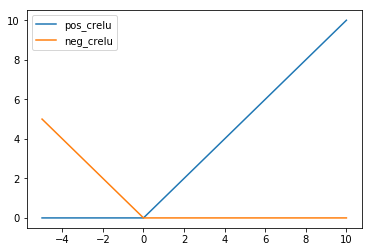

In [9]:
x= np.linspace(-5,10,100)
xtens=tf.constant(x)

with tf.Session() as sess:
    y=sess.run(tf.nn.crelu(xtens))
    plt.plot(x,y[0:len(x)],label='pos_crelu')
    plt.plot(x,y[len(x):2*len(x)],label='neg_crelu')
    #y=sess.run(tf.nn.bias_add(xtens, bias, data_format=None, name=None))
plt.legend()
plt.show()

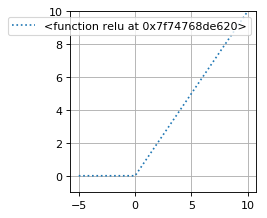

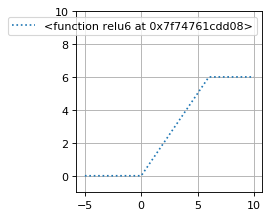

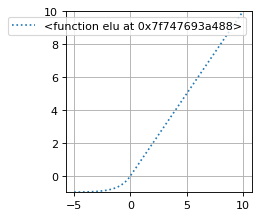

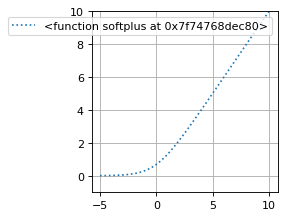

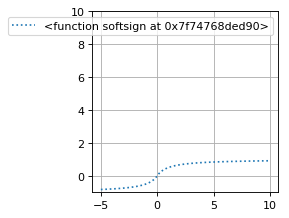

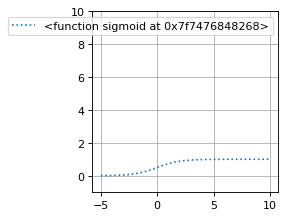

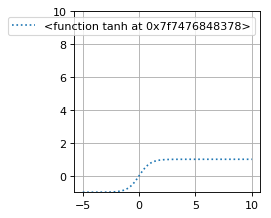

In [10]:
x= np.linspace(-5,10,100)
xtens=tf.constant(x)
alist=[tf.nn.relu, #only positive part
      tf.nn.relu6, #only positive part and for x>6 it remains at 6
      tf.nn.elu, #exp(x)-1 for x<0
     tf.nn.softplus, #log(exp(x) + 1)
       tf.nn.softsign, #x/(abs(x)+1)
       tf.nn.sigmoid, #y = 1 / (1 + exp(-x))
       tf.nn.tanh]

with tf.Session() as sess:
    for f in alist:
        plt.figure(num=None, figsize=(3, 3), dpi=80, facecolor='w', edgecolor='k')
        y=sess.run(f(xtens))
        plt.plot(x,y,label='{}'.format(f),ls=':')
        plt.ylim(-1,10)
        plt.grid()
        plt.legend()
        plt.show()

In [11]:
a=tf.nn.dropout(tf.ones(100), keep_prob=tf.constant(0.5), noise_shape=None, seed=None, name=None)

#With probability keep_prob, outputs the input element scaled up by 1 / keep_prob, otherwise outputs 0. 
#The scaling is so that the expected sum is unchanged.
with tf.Session() as sess:
    print(sess.run(a))
    print(sess.run(tf.reduce_mean(a)))

[ 0.  2.  0.  2.  2.  0.  2.  2.  0.  2.  2.  0.  0.  0.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  0.  0.  2.  2.  2.  0.  2.  0.  0.  2.  0.
  0.  2.  2.  0.  2.  2.  2.  0.  2.  2.  0.  0.  0.  2.  0.  2.  0.  2.
  0.  0.  0.  2.  0.  0.  2.  2.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.
  2.  2.  2.  2.  0.  0.  2.  0.  0.  0.  2.  2.  2.  2.  0.  2.  2.  2.
  0.  2.  0.  0.  2.  2.  0.  2.  2.  0.]
0.82
